# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *J*

**Names:**

* *Gankin, Dennis*
* *Zhang, Yuan*
* *Ji, Yipeng*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [63]:
# ... WRITE YOUR CODE HERE...
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
G = nx.read_edgelist('data/network1.csv',delimiter=',')

In [64]:
print("edges: ", G.number_of_edges())
print("nodes: ", G.number_of_nodes())

edges:  18584
nodes:  13033


#### Exercise 2.2:  Node degree distribution

A histogram will be useful for visualise the node degree distribution.

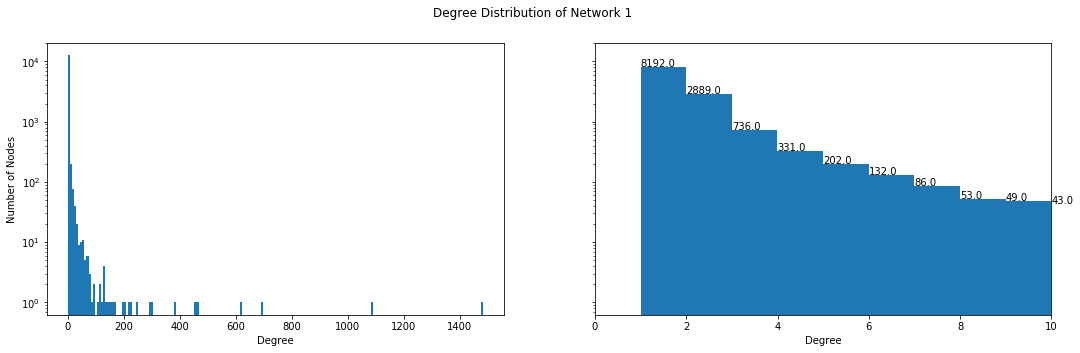

In [65]:
import numpy as np  
degrees = np.array(list((G.degree().values())))

max_degree=0
for d in degrees:
    if d > max_degree:
        max_degree=d
fig, axs = plt.subplots(1,2, sharey=True, figsize=(18,5))
fig.suptitle("Degree Distribution of Network 1")
axs[0].set_yscale('log', basey=10)
axs[0].set_ylabel('Number of Nodes')
axs[0].set_xlabel('Degree')
axs[0].hist(degrees, bins=200)
#show part of the degree histogram
axs[1].set_xlim(0,10)
axs[1].set_xlabel('Degree')
arr=axs[1].hist(degrees, bins=max_degree)
for i in range(10):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

Some properties:
- no nodes is an island (i.e. with degree 0) 
- more than half of the node in the network has degree = 1
- as degree increases, the number of nodes decreases logarithmically 

We use the probability density function of a gamma distribution (a generalised form of geometric distribution) to estimate the degree distribution.

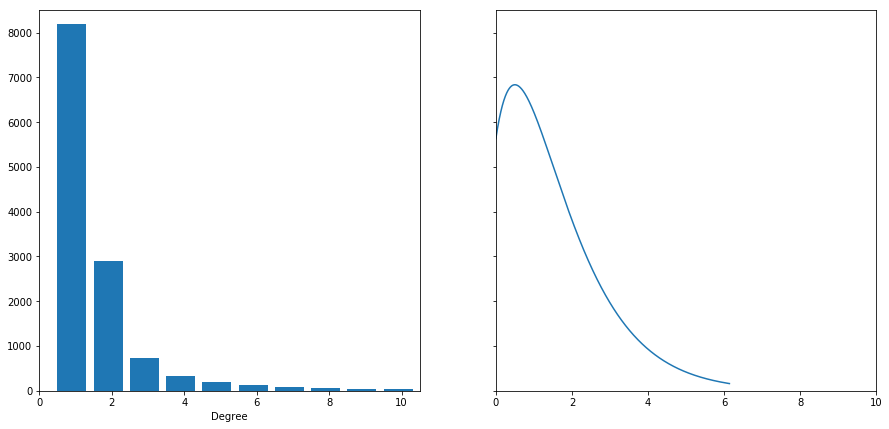

In [66]:
from scipy.stats import gamma
fig, axs = plt.subplots(1,2, sharey=True, figsize=(15,7))
#show part of the degree histogram
axs[0].set_xlim(0,10.5)
axs[0].set_xlabel('Degree')
axs[0].set_ylim(0,8500)
axs[0].hist(degrees-.5, bins=max_degree-1, width=.8)
a = 2
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
x = np.linspace(gamma.ppf(0.01, a, scale=1),gamma.ppf(0.99, a, scale=1), num=1480)
axs[1].set_xlim(0,10)
axs[1].plot(x-.5, 18584*gamma.pdf(x, a), label='gamma pdf')
plt.show()

#### Exercise 2.3: Giant component

In [67]:
nx.number_connected_components(G)

192

As there are many connected components the biggest one is automatically the giant component

In [68]:
largest_cc = max(nx.connected_component_subgraphs(G), key=len)

print ("size:")
print("edges: ", largest_cc.number_of_edges())
print("nodes: ", largest_cc.number_of_nodes(), '(',round(largest_cc.number_of_nodes()/G.number_of_nodes()*100,2), '% of all nodes )' )

size:
edges:  18317
nodes:  12576 ( 96.49 % of all nodes )


#### Exercise 2.4: Short paths & Small-worlds

network1 is not a small world. It is not a connected graph (number of connected components !=1 ). This implies that there are nodes with infinite distance i.e. not connected. 

The cell below proves that even with in connected components, pair(s) of nodes with distance more than 6 exist.

In [69]:
num_node=G.number_of_nodes()
spath_len=[]
#find all shortest paths
break_condition = False
for i in range(0,num_node-1):
    for j in range(0,num_node-1):
        if i < j:
            src = G.nodes()[i]
            dest = G.nodes()[j]
            try:
                for q in nx.all_shortest_paths(G,source=src,target=dest):
                    if (len(q)-1)>6: #path length = number of nodes involved - 1
                        print ("There are nodes with MORE THAN 6 degrees of separation.")
                        break_condition = True
                        break
                    spath_len.append(len(q)-1)
                    a+=1
            except Exception:
                pass
        if break_condition:
            break

There are nodes with MORE THAN 6 degrees of separation.


#### Exercise 2.5: Network comparison

In [70]:
#import graph
G = nx.read_edgelist('data/network2.csv',delimiter=',')

print("edges: ", G.number_of_edges())
print("nodes: ", G.number_of_nodes())

edges:  43516
nodes:  26542


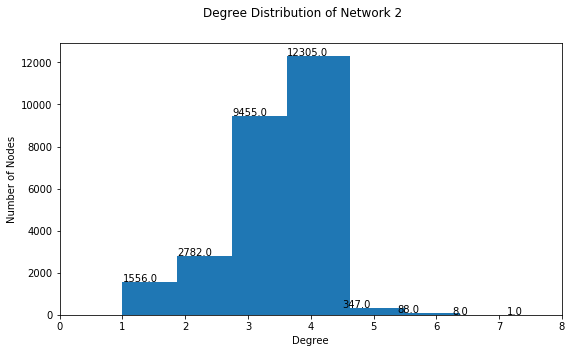

In [71]:
degrees = np.array(list((G.degree().values())))

max_degree=0
for d in degrees:
    if d > max_degree:
        max_degree=d
fig, axs = plt.subplots(1,1, sharey=True, figsize=(9,5))
fig.suptitle("Degree Distribution of Network 2")
# axs[0].set_yscale('log', basey=10)
axs.set_ylabel('Number of Nodes')
axs.set_xlabel('Degree')
axs.set_xlim(0,max_degree)
arr=axs.hist(degrees, bins=max_degree, width=1)
for i in range(max_degree):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
plt.show()

In [10]:
print('number of connected components in network2 = ', nx.number_connected_components(G))

number of connected components in network2 =  5


In [11]:
largest_cc = max(nx.connected_component_subgraphs(G), key=len)

print ("size of the GC in network2:")
print("edges: ", largest_cc.number_of_edges())
print("nodes: ", largest_cc.number_of_nodes(), '(',round(largest_cc.number_of_nodes()/G.number_of_nodes()*100,2), '% of all nodes )' )

size of the GC in network2:
edges:  43437
nodes:  26481 ( 99.77 % of all nodes )


#### Comparison of Graphs

- Network two has around double the amount of edges and nodes than network one, so it is much bigger. 
- Neither network nor and 2 has any node with degree = 0. 
- Network 1 has much more connected components other than its giant component as compared to Network 2.
- The giant component in Network2 accounts for a higher proportion of all nodes(99.77%) than Network 1 (96.49%)

#### Exercise 2.6: Network identification

Network 1: the router connection.
Router is used for packet switching between networks. A data packet is typically forwarded from one router to another router, thus no router should be connected to no other router i.e. with degree=0. The degree-one nodes that make up more than half of the graph are typically homeused router(e.g. DSL routers) at the end of the "tree" hierarchy of routers. The rarer higher-degree nodes represents more sophisticated routers in real like such as an ISP one.

Network 2: roads of New York. In the histogram, we can observe that the majority of the nodes connects to 4 other nodes. This is the common case where a crossroad has 2 perpendicular roads intersecting. There is no node with degree=0, as intersections are created by crossing roads; no "island" intersection can occur. The 5 connected components can be explained by the fact that NYC consists of a peninsula (the GC) and multiple islands, each of which will be a connected component. 